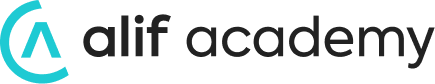

# Модуль 1.1: Python для аналитиков

### Урок №9: Аналитическая задача из маркетинга

Мы разобрали с вами ТЗ от отдела маркетинга на последнем занятии 2023. Теперь давайте добьем это занятие финального состояния ответив на вопросы до конца.. 

К каждому решению прошу приложить объяснение решения в текстовом виде.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Представьте, что вы устроились работать аналитиком в отдел рекламы, и ваша первая задача — помочь коллегам разобраться с некоторыми вопросами:

- Получить статистику по дням. Посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.
- Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?
- Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех кликов объявлений к просмотрам. Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. Различается ли средний и медианный CTR объявлений в наших данных?
- Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?
- Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?
- Для финансового отчета нужно рассчитать наш заработок по дням. В какой день мы заработали больше всего? В какой меньше? Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, и мы списываем деньги за каждый показ CPM объявления, если у CPM объявления цена 200 рублей, то за один показ мы зарабатываем 200 / 1000.
- Какая платформа самая популярная для размещения рекламных объявлений? Сколько процентов показов приходится на каждую из платформ (колонка platform)?
- А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?
   
**Описание колонок**

**date** — день, в который происходят события

**time** — точное время события

**event** — тип события, может быть или показ или клик по рекламе

**platform** — платформа, на которой произошло рекламное событие

**ad_id** — id рекламного объявления

**client_union_id** — id рекламного клиента

**campaign_union_id** — id рекламной кампании

**ad_cost_type** — тип объявления с оплатой за клики (CPC) или за показы (CPM)

**ad_cost** — стоимость объявления в рублях, для CPC объявлений — это цена за клик, для CPM — цена за 1000 показов

**has_video** — есть ли у рекламного объявления видео
target_audience_count — размер аудитории, на которую таргетируется объявление

In [12]:
# Получить статистику по дням. 
# Просто посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.
# Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?

# Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех просмотров объявления к кликам. Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. Различается ли средний и медианный CTR объявлений в наших данных?

# Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! 
# Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

# Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

# Для финансового отчета нужно рассчитать наш заработок по дням. В какой день мы заработали больше всего? В какой меньше? Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, и мы списываем деньги за каждый показ CPM объявления, если у CPM объявления цена - 200 рублей, то за один показ мы зарабатываем 200 / 1000.
# Какая платформа самая популярная для размещения рекламных объявлений? Сколько процентов показов приходится на каждую из платформ (колонка platform)?

# А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

In [13]:
ads_data = pd.read_csv('lesson_5_ads_data.csv.zip', compression='zip')

In [14]:
ads_data.dtypes

ad_id                      int64
time                       int64
event                     object
date                      object
ad_cost_type              object
has_video                  int64
client_union_id            int64
campaign_union_id          int64
platform                  object
ad_cost                  float64
target_audience_count      int64
user_id                    int64
dtype: object

In [15]:
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29


In [16]:
ads_data['full_date'] = pd.to_datetime(ads_data.time, unit='s')

In [17]:
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793,2019-04-01 00:00:48
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041,2019-04-01 16:24:26
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41,2019-04-01 16:24:26
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898,2019-04-01 16:24:26
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29,2019-04-01 16:24:26


In [18]:
ads_data['date'] = pd.to_datetime(ads_data.date)

In [19]:
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793,2019-04-01 00:00:48
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041,2019-04-01 16:24:26
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41,2019-04-01 16:24:26
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898,2019-04-01 16:24:26
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29,2019-04-01 16:24:26


In [20]:
ads_data.shape
ads_data.columns

Index(['ad_id', 'time', 'event', 'date', 'ad_cost_type', 'has_video',
       'client_union_id', 'campaign_union_id', 'platform', 'ad_cost',
       'target_audience_count', 'user_id', 'full_date'],
      dtype='object')

In [21]:
# Получить статистику по дням. 
# Просто посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.
# Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?

<Axes: xlabel='date'>

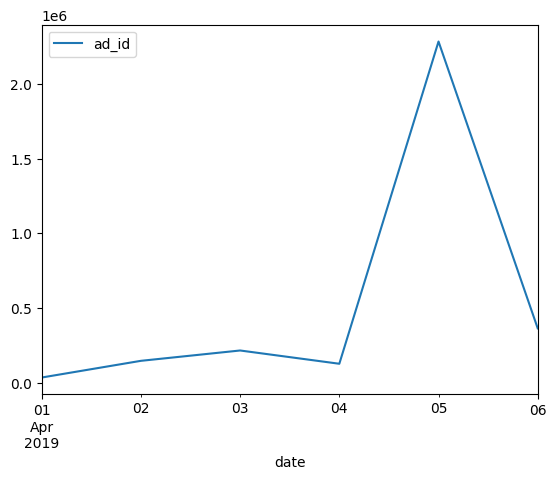

In [22]:
ads_data.groupby('date') \
    .agg({'ad_id': 'count'}).plot()

In [23]:
ads_data.groupby(['date', 'event'], as_index=False) \
    .agg({'ad_id': 'count'}) \
    .pivot(index='date', columns='event', values='ad_id')\
    .reset_index()

event,date,click,view
0,2019-04-01,735,34832
1,2019-04-02,1518,145811
2,2019-04-03,1678,214851
3,2019-04-04,1517,126182
4,2019-04-05,501595,1783288
5,2019-04-06,80420,284287


In [24]:
ads_data[ads_data.date == '2019-04-05'] \
    .groupby('ad_id') \
    .agg({'time': 'count'}) \
    .sort_values('time', ascending=False) \
    .head()

,time
ad_id,
112583,2166611
29927,27186
44635,8268
46583,7327
44956,5656


In [25]:
ad_id = 112583

In [26]:
ads_data.describe()

,ad_id,time,date,has_video,client_union_id,campaign_union_id,ad_cost,target_audience_count,user_id,full_date
count,3.176714e+06,3.176714e+06,3176714,3.176714e+06,3.176714e+06,3.176714e+06,3.176714e+06,3.176714e+06,3.176714e+06,3176714
mean,1.028316e+05,1.554441e+09,2019-04-04 18:06:17.330285568,2.255161e-03,1.008235e+05,1.025734e+05,1.946914e+02,8.359324e+05,4.167535e+03,2019-04-05 05:10:34.675120896
min,3.000000e+00,1.554077e+09,2019-04-01 00:00:00,0.000000e+00,1.000000e+00,1.000000e+00,4.240000e+01,1.860000e+02,1.000000e+00,2019-04-01 00:00:48
25%,1.125830e+05,1.554447e+09,2019-04-05 00:00:00,0.000000e+00,1.118180e+05,1.122600e+05,1.994000e+02,2.394080e+05,2.508000e+03,2019-04-05 06:46:29
50%,1.125830e+05,1.554470e+09,2019-04-05 00:00:00,0.000000e+00,1.118180e+05,1.122600e+05,1.994000e+02,2.394080e+05,4.421000e+03,2019-04-05 13:05:25
75%,1.125830e+05,1.554488e+09,2019-04-05 00:00:00,0.000000e+00,1.118180e+05,1.122600e+05,1.994000e+02,2.394080e+05,5.855000e+03,2019-04-05 18:13:04
max,1.220860e+05,1.554509e+09,2019-04-06 00:00:00,1.000000e+00,1.220860e+05,1.220860e+05,2.254000e+02,1.549714e+08,8.490000e+03,2019-04-05 23:59:30
std,2.557407e+04,8.225481e+04,NaN,4.743496e-02,2.909663e+04,2.547980e+04,2.478399e+01,6.136294e+06,2.038522e+03,NaN


In [27]:
ads_data.query('ad_id == @ad_id').head(1)


,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
527124,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,web,199.4,239408,4355,2019-04-05 16:10:36


In [28]:
# Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех просмотров объявления к кликам. 
# Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. 
# Различается ли средний и медианный CTR объявлений в наших данных?

In [29]:
ads_data_by_ad = ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index()

In [30]:
ads_data_by_ad

event,ad_id,click,view
0,3,9.0,490.0
1,2132,1.0,95.0
2,2276,2.0,1454.0
3,2475,NaN,132.0
4,2643,3.0,286.0
...,...,...,...
350,121941,1.0,640.0
351,121943,15.0,1722.0
352,122042,1.0,155.0
353,122063,1.0,260.0


In [31]:
ads_data_by_ad = ads_data_by_ad.assign(ctr = ads_data_by_ad.click / ads_data_by_ad.view, 
                           ctr_per = 100 * ads_data_by_ad.click / ads_data_by_ad.view)

In [32]:
ads_data_by_ad

event,ad_id,click,view,ctr,ctr_per
0,3,9.0,490.0,0.018367,1.836735
1,2132,1.0,95.0,0.010526,1.052632
2,2276,2.0,1454.0,0.001376,0.137552
3,2475,NaN,132.0,NaN,NaN
4,2643,3.0,286.0,0.010490,1.048951
...,...,...,...,...,...
350,121941,1.0,640.0,0.001563,0.156250
351,121943,15.0,1722.0,0.008711,0.871080
352,122042,1.0,155.0,0.006452,0.645161
353,122063,1.0,260.0,0.003846,0.384615


In [33]:
ads_data_by_ad.sort_values('ctr', ascending=False).head(10)

event,ad_id,click,view,ctr,ctr_per
289,112583,580436.0,1934788.0,0.300000,29.999979
324,119450,258.0,1254.0,0.205742,20.574163
125,38575,43.0,257.0,0.167315,16.731518
144,40968,29.0,217.0,0.133641,13.364055
207,45642,42.0,344.0,0.122093,12.209302
283,110924,11.0,95.0,0.115789,11.578947
194,45043,28.0,245.0,0.114286,11.428571
96,35034,112.0,997.0,0.112337,11.233701
5,4585,53.0,476.0,0.111345,11.134454
328,120347,236.0,2168.0,0.108856,10.885609


In [34]:
ads_data_by_ad.ctr.describe()

count    306.000000
mean       0.020628
std        0.030360
min        0.000451
25%        0.005943
50%        0.010753
75%        0.024072
max        0.300000
Name: ctr, dtype: float64

In [35]:
ads_data_by_ad.ctr.mean()

0.020628096080757954

In [36]:
ads_data_by_ad.ctr.median()

0.010753240746688594

/var/folders/9p/2b9k_p8n1_xcx6qqb22xgw780000gn/T/ipykernel_98355/279935430.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ads_data_by_ad.ctr, kde=False)


<Axes: xlabel='ctr'>

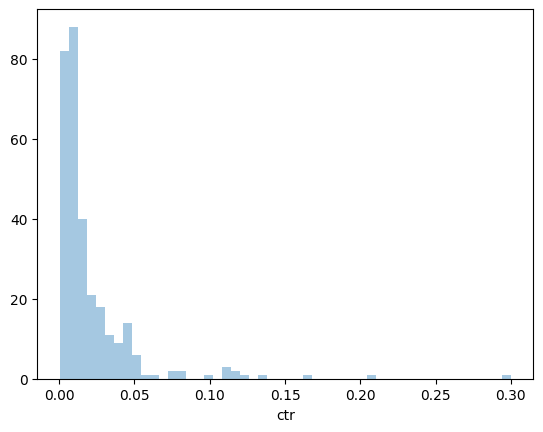

In [37]:
sns.distplot(ads_data_by_ad.ctr, kde=False)

In [38]:
# Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! 
# Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

In [39]:
ads_data_by_ad = ads_data_by_ad.fillna(0)

In [40]:
ads_ids_bug = ads_data_by_ad.query('view == 0').ad_id

In [41]:
ads_data_by_ad

event,ad_id,click,view,ctr,ctr_per
0,3,9.0,490.0,0.018367,1.836735
1,2132,1.0,95.0,0.010526,1.052632
2,2276,2.0,1454.0,0.001376,0.137552
3,2475,0.0,132.0,0.000000,0.000000
4,2643,3.0,286.0,0.010490,1.048951
...,...,...,...,...,...
350,121941,1.0,640.0,0.001563,0.156250
351,121943,15.0,1722.0,0.008711,0.871080
352,122042,1.0,155.0,0.006452,0.645161
353,122063,1.0,260.0,0.003846,0.384615


In [42]:
ads_ids_bug

50      25665
77      30381
150     41424
161     42241
213     45866
219     46363
224     46544
294    113348
331    120444
Name: ad_id, dtype: int64

In [43]:
len(ads_ids_bug)

9

In [44]:
ads_data[ads_data.ad_id.isin(ads_ids_bug)] \
    .groupby('platform', as_index=False) \
    .agg({'ad_id': 'count'}) \
    .sort_values('ad_id')

,platform,ad_id
2,web,53
1,ios,92
0,android,141


In [45]:
ads_data \
    .groupby('platform', as_index=False) \
    .agg({'ad_id': 'count'}) \
    .sort_values('ad_id')

,platform,ad_id
2,web,635425
1,ios,953078
0,android,1588211


In [46]:
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793,2019-04-01 00:00:48
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041,2019-04-01 16:24:26
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41,2019-04-01 16:24:26
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898,2019-04-01 16:24:26
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29,2019-04-01 16:24:26


In [47]:
# Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

In [48]:
ads_data[ads_data.date == '2019-04-04'].groupby(['event', 'has_video'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='event', columns='has_video', values='time').reset_index() 
# \
#     .drop('events', axis=1)


has_video,event,0,1
0,click,1515,2
1,view,126072,110


In [49]:
df_2019_04_04 =  ads_data[ads_data.date == '2019-04-04'].groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() \
    .fillna(0)
df_2019_04_04

event,ad_id,click,view
0,9071,3.0,352.0
1,9776,37.0,1115.0
2,10601,3.0,848.0
3,11887,151.0,8720.0
4,12137,1.0,170.0
...,...,...,...
145,120790,0.0,19.0
146,121779,68.0,1116.0
147,121790,7.0,701.0
148,121941,0.0,95.0


In [50]:
df_2019_04_04['ctr'] = df_2019_04_04.click / df_2019_04_04.view

In [51]:
df_2019_04_04[df_2019_04_04.click > 0].ctr.quantile(q=0.95)

0.10211538461538454

In [52]:
# Для финансового отчета нужно рассчитать наш заработок по дням. 
# В какой день мы заработали больше всего? В какой меньше? 
# Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, 
# и мы списываем деньги за каждый показ CPM объявления, если у 
# CPM объявления цена - 200 рублей, то за один показ мы зарабатываем 200 / 1000.
# Какая платформа самая популярная для размещения рекламных объявлений? 
# Сколько процентов показов приходится на каждую из платформ (колонка platform)?


In [53]:
x = pd.Series([1, 2, 3])

In [54]:
import numpy as np

In [55]:
ads_data[(ads_data.ad_cost_type == 'CPC') &  (ads_data.event == 'click')].ad_cost.sum()

84810.0

In [56]:
ads_data[(ads_data.ad_cost_type == 'CPM') &  (ads_data.event == 'view')].ad_cost.sum() / 1000

497090.6778000003

In [57]:
# А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

In [58]:
ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'min'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() \
    .query('click < view')

event,ad_id,click,view
27,16548,1.554336e+09,1.554336e+09
81,30939,1.554165e+09,1.554173e+09
138,40464,1.554164e+09,1.554164e+09
158,42007,1.554423e+09,1.554423e+09
185,44543,1.554336e+09,1.554337e+09
201,45436,1.554336e+09,1.554336e+09
324,119450,1.554336e+09,1.554336e+09


In [59]:
ads_data[ads_data.ad_id == 16548].sort_values('time')

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
512690,16548,1554336083,click,2019-04-04,CPM,0,722,16523,ios,196.6,53199,4133,2019-04-04 00:01:23
511482,16548,1554336278,view,2019-04-04,CPM,0,722,16523,android,196.6,53199,3736,2019-04-04 00:04:38
511439,16548,1554336352,view,2019-04-04,CPM,0,722,16523,android,196.6,53199,4968,2019-04-04 00:05:52
511438,16548,1554336352,view,2019-04-04,CPM,0,722,16523,ios,196.6,53199,4206,2019-04-04 00:05:52
511437,16548,1554336352,view,2019-04-04,CPM,0,722,16523,web,196.6,53199,3898,2019-04-04 00:05:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056433,16548,1554422265,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,3613,2019-04-04 23:57:45
2056432,16548,1554422265,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,6044,2019-04-04 23:57:45
2056461,16548,1554422308,view,2019-04-05,CPM,0,722,16523,ios,196.6,53199,5831,2019-04-04 23:58:28
2056652,16548,1554422338,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,2837,2019-04-04 23:58:58
